<br>

# Feature Engineering for NLP in Python

<br>

## Introductiont to NLP Feature Engineering

For an ML algorithm, data fed into it must be in tabular form and all the training features must be numerical.  
**One-hot-encoding** - can be useful for recoding text information for ML algorithms.  
use the `get_dummies()` function from the `pandas` library.  

    # Import the pandas library
    import pandas as pf
    
    # Perform one-hot encoding on a feature in a dataframe
    df = get_dummies( df, columns = ['feature'] )

<br>

### Basic Feature Extraction

**Number of Characters** - length of the string (including white space).

    text = 'I don't know'
    num_char = len( text )
    
    # create a 'num_chars' feature
    df[ 'num_chars' ] = df[ 'review' ].apply( len )
    
**Number of Words**  

    text = "Mary had a littel lamb"
    words = text.split( )
    num_words = len( words )
    
    # create a 'num_words' feature
    def word_count( text ):
        words = string.split()
        return len( words )
    df[ 'num_words' ] = df[ 'review' ].apply( word_count )

**Average Word Length**

    #define a function that returns the average word length of a string of words.
    def avg_word_length( x ):
        words = x.split()
        word_lengths = [len( word ) for word in words ]
        avg_len = sum( word_lengths )/len( word_lengths )
        return( avg_len )
        
    # create a 'avg_word_length' feature
    df[ 'avg_word_length' ] = df[ 'review' ].apply( doc_density )
    
**Special Features:** counts of hashtags and mentions in tweet data

    # Function that returns number of hashtags
    def hashtag_count( string ):
        # split the string into words
        words = string.split()
        # create a list of hashtags
        hashtags = [ word for word in words if word.startswith( '#' )]
        # return the number of hashtags
        return len( hashtags )
    def mentions_count( string ):
        # split the string into words
        words = string.split()
        # create a list of hashtags
        mentions = [ word for word in words if word.startswith( '@' )]
        # return the number of hashtags
        return len( mentions )   
        
    # create 'hashtag_count' and 'mentions_count' features
    df[ 'num_hashtags' ] = df[ 'review' ].apply( hashtag_count )
    df[ 'num_mentions' ] = df[ 'review' ].apply( mentions_count )
    
**Other features**  

* Number of sentences
* Number of paragraphs
* Words starting with an uppercase
* All-capital words
* Numeric quantities
* etc.

<br>

In [2]:
import pandas as pd

tweets = pd.read_csv( 'russian_tweets.csv' )
tweets.head()

,Unnamed: 0,content
0,127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...
1,123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...
2,226970,.@vfpatlas well that's a swella word there (di...
3,138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...
4,161610,Жители обстреливаемых районов Донецка проводят...


In [3]:
# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(len)

# Print the average character count
print( 'mean tweet length: ', tweets['char_count'].mean())
tweets.head()

mean tweet length:  103.462


,Unnamed: 0,content,char_count
0,127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...,130
1,123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...,138
2,226970,.@vfpatlas well that's a swella word there (di...,65
3,138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...,139
4,161610,Жители обстреливаемых районов Донецка проводят...,131


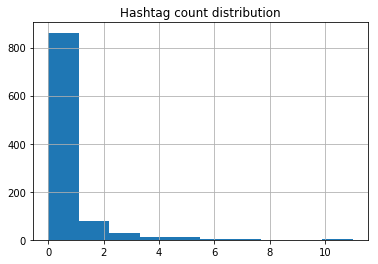

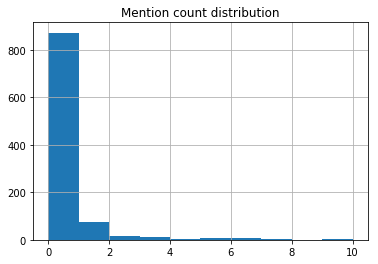

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Function that returns numner of hashtags in a string
def count_hashtags(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)
tweets['hashtag_count'].hist()
plt.title('Hashtag count distribution')
plt.show()

# Function that returns number of mentions in a string
def count_mentions(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]
    
    # Return number of mentions
    return(len(mentions))

# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['content'].apply(count_mentions)
tweets['mention_count'].hist()
plt.title('Mention count distribution')
plt.show()

In [5]:
ted = pd.read_csv( 'ted.csv' )

# Function that returns number of words in a string
def count_words(string):
	# Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

# Create a new feature word_count
ted['word_count'] = ted['transcript'].apply(count_words)

# Print the average word count of the talks
print(ted['word_count'].mean())

1987.1


<br>

### Readability Tests

Determine the readability of an English passage of text.  
A mathematical formula is used to determine readability the utilizes the word, syllable and sentence count of a piece of text.  

Readability Tests (English):  

* Flesch reading ease
* Gunning fog index
* Simple Measure of Gobbledygook (SMOG)
* Dale-Chacll score

**Flesch Reading Ease:**

* One of the oldest and most widely used tests
* Dependent on 2 factors:
    * the greater the average sentence length, the harder the text is to read
    * the greater the average number of syllables in a word, the harder the text is to read
* the higher the Flesch reading score, the greater the readability
    * score: 90-100 $\rightarrow$ 5th grade level
    * score: 60-70 $\rightarrow$ 8-9th grade level
    * score: 0-30 $\rightarrow$ College graduate
    
**Gunning Fog Index:**

* Also dependent on average sentence length
* Greater the percentage of complex words, the harder the text is to read
    * where a complex word is any word with 3+ syllables
* the Higher the score, the more difficult the text is to understand
    * score: 6 $\rightarrow$ 6th grade
    * score: 17 $\rightarrow$ College 
    
**Implementation**  
Use the `textatistic` library

    # Import the Textatistic class
    from textatistic import Textatistic
    
    # Create a Textatistic Object
    readability_scores = Textatistic( text ).scores
    
    # Return the scores
    print( readability_scores['flesch_score'] )
    print( readability_scores = ['gunnungfog_score'] )
    
<br>

In [6]:
sisyphus_essay = """\nThe gods had condemned Sisyphus to ceaselessly rolling a rock to the top of a mountain, 
whence the stone would fall back of its own weight. They had thought with some reason that there is no more 
dreadful punishment than futile and hopeless labor. If one believes Homer, Sisyphus was the wisest and most 
prudent of mortals. According to another tradition, however, he was disposed to practice the profession of 
highwayman. I see no contradiction in this. Opinions differ as to the reasons why he became the futile laborer 
of the underworld. To begin with, he is accused of a certain levity in regard to the gods. He stole their secrets. 
Egina, the daughter of Esopus, was carried off by Jupiter. The father was shocked by that disappearance and 
complained to Sisyphus. He, who knew of the abduction, offered to tell about it on condition that Esopus would 
give water to the citadel of Corinth. To the celestial thunderbolts he preferred the benediction of water. 
He was punished for this in the underworld. Homer tells us also that Sisyphus had put Death in chains. 
Pluto could not endure the sight of his deserted, silent empire. He dispatched the god of war, who liberated 
Death from the hands of her conqueror. It is said that Sisyphus, being near to death, rashly wanted to test 
his wife\'s love. He ordered her to cast his unburied body into the middle of the public square. 
Sisyphus woke up in the underworld. And there, annoyed by an obedience so contrary to human love, he obtained 
from Pluto permission to return to earth in order to chastise his wife. But when he had seen again the face of 
this world, enjoyed water and sun, warm stones and the sea, he no longer wanted to go back to the infernal 
darkness. Recalls, signs of anger, warnings were of no avail. Many years more he lived facing the curve of the 
gulf, the sparkling sea, and the smiles of earth. A decree of the gods was necessary. Mercury came and seized 
the impudent man by the collar and, snatching him from his joys, lead him forcibly back to the underworld, where 
his rock was ready for him. You have already grasped that Sisyphus is the absurd hero. He is, as much through his 
passions as through his torture. His scorn of the gods, his hatred of death, and his passion for life won him 
that unspeakable penalty in which the whole being is exerted toward accomplishing nothing. This is the price 
that must be paid for the passions of this earth. Nothing is told us about Sisyphus in the underworld. 
Myths are made for the imagination to breathe life into them. As for this myth, one sees merely the whole 
effort of a body straining to raise the huge stone, to roll it, and push it up a slope a hundred times over; 
one sees the face screwed up, the cheek tight against the stone, the shoulder bracing the clay-covered mass, 
the foot wedging it, the fresh start with arms outstretched, the wholly human security of two earth-clotted hands. 
At the very end of his long effort measured by skyless space and time without depth, the purpose is achieved. 
Then Sisyphus watches the stone rush down in a few moments toward tlower world whence he will have to push it 
up again toward the summit. He goes back down to the plain. It is during that return, that pause, that Sisyphus 
interests me. A face that toils so close to stones is already stone itself! I see that man going back down with 
a heavy yet measured step toward the torment of which he will never know the end. That hour like a breathing-space 
which returns as surely as his suffering, that is the hour of consciousness. At each of those moments when he 
leaves the heights and gradually sinks toward the lairs of the gods, he is superior to his fate. He is stronger 
than his rock. If this myth is tragic, that is because its hero is conscious. Where would his torture be, indeed, 
if at every step the hope of succeeding upheld him? The workman of today works everyday in his life at the same 
tasks, and his fate is no less absurd. But it is tragic only at the rare moments when it becomes conscious. 
Sisyphus, proletarian of the gods, powerless and rebellious, knows the whole extent of his wretched condition: 
it is what he thinks of during his descent. The lucidity that was to constitute his torture at the same time 
crowns his victory. There is no fate that can not be surmounted by scorn. If the descent is thus sometimes 
performed in sorrow, it can also take place in joy. This word is not too much. Again I fancy Sisyphus returning 
toward his rock, and the sorrow was in the beginning. When the images of earth cling too tightly to memory, 
when the call of happiness becomes too insistent, it happens that melancholy arises in man\'s heart: 
this is the rock\'s victory, this is the rock itself. The boundless grief is too heavy to bear. These are our 
nights of Gethsemane. But crushing truths perish from being acknowledged. Thus, Edipus at the outset obeys fate 
without knowing it. But from the moment he knows, his tragedy begins. Yet at the same moment, blind and desperate, 
he realizes that the only bond linking him to the world is the cool hand of a girl. Then a tremendous remark 
rings out: "Despite so many ordeals, my advanced age and the nobility of my soul make me conclude that all is 
well." Sophocles\' Edipus, like Dostoevsky\'s Kirilov, thus gives the recipe for the absurd victory. Ancient 
wisdom confirms modern heroism. One does not discover the absurd without being tempted to write a manual of 
happiness. "What!---by such narrow ways--?" There is but one world, however. Happiness and the absurd are two 
sons of the same earth. They are inseparable. It would be a mistake to say that happiness necessarily springs 
from the absurd. Discovery. It happens as well that the felling of the absurd springs from happiness. "I 
conclude that all is well," says Edipus, and that remark is sacred. It echoes in the wild and limited universe 
of man. It teaches that all is not, has not been, exhausted. It drives out of this world a god who had come into 
it with dissatisfaction and a preference for futile suffering. It makes of fate a human matter, which must be 
settled among men. All Sisyphus\' silent joy is contained therein. His fate belongs to him. His rock is a thing. 
Likewise, the absurd man, when he contemplates his torment, silences all the idols. In the universe suddenly 
restored to its silence, the myriad wondering little voices of the earth rise up. Unconscious, secret calls, 
invitations from all the faces, they are the necessary reverse and price of victory. There is no sun without 
shadow, and it is essential to know the night. The absurd man says yes and his efforts will henceforth be 
unceasing. If there is a personal fate, there is no higher destiny, or at least there is, but one which he 
concludes is inevitable and despicable. For the rest, he knows himself to be the master of his days. At that 
subtle moment when man glances backward over his life, Sisyphus returning toward his rock, in that slight 
pivoting he contemplates that series of unrelated actions which become his fate, created by him, combined 
under his memory\'s eye and soon sealed by his death. Thus, convinced of the wholly human origin of all that 
is human, a blind man eager to see who knows that the night has no end, he is still on the go. The rock is 
still rolling. I leave Sisyphus at the foot of the mountain! One always finds one\'s burden again. 
But Sisyphus teaches the higher fidelity that negates the gods and raises rocks. He too concludes that all is 
well. This universe henceforth without a master seems to him neither sterile nor futile. Each atom of that stone, 
each mineral flake of that night filled mountain, in itself forms a world. The struggle itself toward the heights 
is enough to fill a man\'s heart. One must imagine Sisyphus happy.\n"""

# Import Textatistic
from textatistic import Textatistic

# Compute the readability scores 
readability_scores = Textatistic(sisyphus_essay).scores

# Print the flesch reading ease score
flesch = readability_scores['flesch_score']
print("The Flesch Reading Ease is %.2f" % (flesch))

The Flesch Reading Ease is 81.67


In [7]:
forbes = '\nThe idea is to create more transparency about companies and individuals that are breaking the law or are non-compliant with official obligations and incentivize the right behaviors with the overall goal of improving governance and market order. The Chinese Communist Party intends the social credit score system to “allow the trustworthy to roam freely under heaven while making it hard for the discredited to take a single step.” Even though the system is still under development it currently plays out in real life in myriad ways for private citizens, businesses and government officials. Generally, higher credit scores give people a variety of advantages. Individuals are often given perks such as discounted energy bills and access or better visibility on dating websites. Often, those with higher social credit scores are able to forgo deposits on rental properties, bicycles, and umbrellas. They can even get better travel deals. In addition, Chinese hospitals are currently experimenting with social credit scores. A social credit score above 650 at one hospital allows an individual to see a doctor without lining up to pay.\n'
harvard_law = '\nIn his important new book, The Schoolhouse Gate: Public Education, the Supreme Court, and the Battle for the American Mind, Professor Justin Driver reminds us that private controversies that arise within the confines of public schools are part of a broader historical arc — one that tracks a range of cultural and intellectual flashpoints in U.S. history. Moreover, Driver explains, these tensions are reflected in constitutional law, and indeed in the history and jurisprudence of the Supreme Court. As such, debates that arise in the context of public education are not simply about the conflict between academic freedom, public safety, and student rights. They mirror our persistent struggle to reconcile our interest in fostering a pluralistic society, rooted in the ideal of individual autonomy, with our desire to cultivate a sense of national unity and shared identity (or, put differently, our effort to reconcile our desire to forge common norms of citizenship with our fear of state indoctrination and overencroachment). In this regard, these debates reflect the unique role that both the school and the courts have played in defining and enforcing the boundaries of American citizenship. \n'
r_digest = '\nThis week 30 passengers were reportedly injured when a Turkish Airlines flight landing at John F. Kennedy International Airport encountered turbulent conditions. Injuries included bruises, bloody noses, and broken bones. In mid-February, a Delta Airlines flight made an emergency landing to assist three passengers in getting to the nearest hospital after some sudden and unexpected turbulence. Doctors treated 15 passengers after a flight from Miami to Buenos Aires last October for everything from severe bruising to nosebleeds after the plane caught some rough winds over Brazil. In 2016, 23 passengers were injured on a United Airlines flight after severe turbulence threw people into the cabin ceiling. The list goes on. Turbulence has been become increasingly common, with painful outcomes for those on board. And more costly to the airlines, too. Forbes estimates that the cost of turbulence has risen to over $500 million each year in damages and delays. And there are no signs the increase in turbulence will be stopping anytime soon.\n'
time_kids = '\nThat, of course, is easier said than done. The more you eat salty foods, the more you develop a taste for them. The key to changing your diet is to start small. “Small changes in sodium in foods are not usually noticed,” Quader says. Eventually, she adds, the effort will reset a kid’s taste buds so the salt cravings stop. Bridget Murphy is a dietitian at New York University’s Langone Medical Center. She suggests kids try adding spices to their food instead of salt. Eating fruits and veggies and cutting back on packaged foods will also help. Need a little inspiration? Murphy offers this tip: Focus on the immediate effects of a diet that is high in sodium. High blood pressure can make it difficult to be active. “Do you want to be able to think clearly and perform well in school?” she asks. “If you’re an athlete, do you want to run faster?” If you answered yes to these questions, then it’s time to shake the salt habit.\n'

# Import Textatistic
from textatistic import Textatistic

# List of excerpts
excerpts = [forbes, harvard_law, r_digest, time_kids]

# Loop through excerpts and compute gunning fog index
gunning_fog_scores = []
for excerpt in excerpts:
    #print( excerpt )
    #print( type( excerpt ) )
  readability_scores = Textatistic(time_kids).scores
  gunning_fog = readability_scores['gunningfog_score']
  gunning_fog_scores.append(gunning_fog)

# Print the gunning fog indices
print(gunning_fog_scores)

[5.926785009861934, 5.926785009861934, 5.926785009861934, 5.926785009861934]


<br>

## Text Preprocessing, POS tagging and NER

### Tokenization and Lemmatization

making text machine friendly  

text preprocessing techniques:  

* Converting words into lowercase
* removing leading and trailing whitespace
* removing punctuation
* removing stopwords
* expanding contractions
* removing special characters ( numbers, emojis, etc. )


**Lemmatization** - converting a word into its base form (lemma)

<br>

In [8]:
text1 = 'I have a dog. His name is Hachi.'
text2 = "Don't do this"

import spacy
nlp = spacy.load( 'en_core_web_sm' )
doc = nlp( text1 )

print( 'text1:')
#generate a list of tokens
tokens = [ token.text for token in doc ]
print( tokens )
#generate a list of lemmas
lemmas = [ token.lemma_ for token in doc ]
print( lemmas )

doc2 = nlp( text2 )

print( 'text2:')
#generate a list of tokens
tokens = [ token.text for token in doc2 ]
print( tokens )
#generate a list of lemmas
lemmas = [ token.lemma_ for token in doc2 ]
print( lemmas )

text1:
['I', 'have', 'a', 'dog', '.', 'His', 'name', 'is', 'Hachi', '.']
['I', 'have', 'a', 'dog', '.', 'his', 'name', 'be', 'Hachi', '.']
text2:
['Do', "n't", 'do', 'this']
['do', "n't", 'do', 'this']


In [9]:
gettysberg = """Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we're engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We're met on a great battlefield of that war. We've come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It's altogether fitting and proper that we should do this. But, in a larger sense, we can't dedicate - we can not consecrate - we can not hallow - this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It's rather for us to be here dedicated to the great task remaining before us - that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion - that we here highly resolve that these dead shall not have died in vain - that this nation, under God, shall have a new birth of freedom - and that government of the people, by the people, for the people, shall not perish from the earth."""

# Create a Doc object
doc = nlp(gettysberg)

# Generate the tokens
tokens = [token.text for token in doc]
print(tokens)

# Generate lemmas
lemmas = [token.lemma_ for token in doc]

# Convert lemmas into a string
print(' '.join(lemmas))

['Four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers', 'brought', 'forth', 'on', 'this', 'continent', ',', 'a', 'new', 'nation', ',', 'conceived', 'in', 'Liberty', ',', 'and', 'dedicated', 'to', 'the', 'proposition', 'that', 'all', 'men', 'are', 'created', 'equal', '.', 'Now', 'we', "'re", 'engaged', 'in', 'a', 'great', 'civil', 'war', ',', 'testing', 'whether', 'that', 'nation', ',', 'or', 'any', 'nation', 'so', 'conceived', 'and', 'so', 'dedicated', ',', 'can', 'long', 'endure', '.', 'We', "'re", 'met', 'on', 'a', 'great', 'battlefield', 'of', 'that', 'war', '.', 'We', "'ve", 'come', 'to', 'dedicate', 'a', 'portion', 'of', 'that', 'field', ',', 'as', 'a', 'final', 'resting', 'place', 'for', 'those', 'who', 'here', 'gave', 'their', 'lives', 'that', 'that', 'nation', 'might', 'live', '.', 'It', "'s", 'altogether', 'fitting', 'and', 'proper', 'that', 'we', 'should', 'do', 'this', '.', 'But', ',', 'in', 'a', 'larger', 'sense', ',', 'we', 'ca', "n't", 'dedicate', '-', 'we', '

<br>

### Text Cleaning

Text cleaning techniques:
* unnecessary whitespace and escape sequences
* punctuations
* special characters (number, emojis, etc.)
* stopwords

<br>

In [10]:
text = """
OMG!!! This is like    the best thing ever \t\n.
Wow, such an amazing song. I'm hooked. Top 5 definitely. ?
"""

doc = nlp( text.lower() )
lemmas = [ token.lemma_ for token in doc ]
print( lemmas )

a_lemmas = [ lemma for lemma in lemmas
           if lemma.isalpha() or lemma in '-PRON-' ]
print( a_lemmas )

['\n', 'omg', '!', '!', '!', 'this', 'be', 'like', '   ', 'the', 'good', 'thing', 'ever', '\t\n', '.', '\n', 'wow', ',', 'such', 'an', 'amazing', 'song', '.', 'I', 'be', 'hooked', '.', 'top', '5', 'definitely', '.', '?', '\n']
['omg', 'this', 'be', 'like', 'the', 'good', 'thing', 'ever', 'wow', 'such', 'an', 'amazing', 'song', 'I', 'be', 'hooked', 'top', 'definitely']


In [11]:
for token in doc:
    print(token.text, " -- ", token.pos_, " -- ",token.lemma_)


  --  SPACE  --  

omg  --  NOUN  --  omg
!  --  PUNCT  --  !
!  --  PUNCT  --  !
!  --  PUNCT  --  !
this  --  DET  --  this
is  --  AUX  --  be
like  --  ADP  --  like
     --  SPACE  --     
the  --  DET  --  the
best  --  ADJ  --  good
thing  --  NOUN  --  thing
ever  --  ADV  --  ever
	
  --  SPACE  --  	

.  --  PUNCT  --  .

  --  SPACE  --  

wow  --  INTJ  --  wow
,  --  PUNCT  --  ,
such  --  DET  --  such
an  --  DET  --  an
amazing  --  ADJ  --  amazing
song  --  NOUN  --  song
.  --  PUNCT  --  .
i  --  PRON  --  I
'm  --  VERB  --  be
hooked  --  ADJ  --  hooked
.  --  PUNCT  --  .
top  --  ADJ  --  top
5  --  NUM  --  5
definitely  --  ADV  --  definitely
.  --  PUNCT  --  .
?  --  PUNCT  --  ?

  --  SPACE  --  



In [12]:
b_lemmas = [ token.lemma_ for token in doc
           if token.lemma_.isalpha() or token.pos_ == '-PRON-' ]
print( ' '.join( b_lemmas ) )

omg this be like the good thing ever wow such an amazing song I be hooked top definitely


<br>

**Stopwords** 

* words that occur so often that they do not add informational value to the text
* ex: articles, be verbs, pronouns etc

<br>

In [13]:
# get list of spacy STOPWORDS
stopwords = spacy.lang.en.stop_words.STOP_WORDS
print( stopwords )

a_lemmas = [ lemma for lemma in lemmas
           if lemma.isalpha() and lemma.lower() not in stopwords ]
print( ' '.join( a_lemmas ) )

{'into', 'nor', 'somewhere', 'used', 'myself', 'other', 'to', 'very', 'get', 'sixty', 'both', 'whereupon', 'eleven', 'anyhow', 'during', 'made', 'namely', 'cannot', 'doing', 'without', 'even', 'no', 'wherein', 'only', 'after', "'m", 'although', 'name', 'here', 'really', 'yet', 'as', 'most', 'within', 'all', 'whenever', 'toward', 'meanwhile', 'former', 'ca', 'again', 'noone', 'per', 'being', 'fifteen', 'mine', 'itself', 'whose', 'move', 'several', 'sometimes', 'whence', 'together', 'something', 'though', 'when', 'top', 'behind', 'show', 'through', 'hence', 'just', 'except', 'next', 'over', 'therefore', 'you', 'using', 'thus', 'until', 'had', 'then', 'up', 'someone', 'therein', 'another', 'yourselves', 'please', 'never', 'nobody', 'because', 'whole', 'we', 'such', 'twenty', 'twelve', 'her', "'ve", 'under', 'did', 'whereby', 'been', 'elsewhere', 'about', 'much', 'put', 'one', 'are', 'their', 'see', "'ll", 'forty', 'thru', 'nowhere', 'beside', 'on', 'beyond', 'where', 'your', '’re', 'does'

In [14]:
blog = '\nTwenty-first-century politics has witnessed an alarming rise of populism in the U.S. and Europe. The first warning signs came with the UK Brexit Referendum vote in 2016 swinging in the way of Leave. This was followed by a stupendous victory by billionaire Donald Trump to become the 45th President of the United States in November 2016. Since then, Europe has seen a steady rise in populist and far-right parties that have capitalized on Europe’s Immigration Crisis to raise nationalist and anti-Europe sentiments. Some instances include Alternative for Germany (AfD) winning 12.6% of all seats and entering the Bundestag, thus upsetting Germany’s political order for the first time since the Second World War, the success of the Five Star Movement in Italy and the surge in popularity of neo-nazism and neo-fascism in countries such as Hungary, Czech Republic, Poland and Austria.\n'
doc = nlp( blog )

lemmas = [ token.lemma_ for token in doc ]

# Remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma.lower() not in stopwords]

# Print string after text cleaning
print(' '.join(a_lemmas))


century politic witness alarming rise populism Europe warning sign come UK Brexit Referendum vote swinging way Leave follow stupendous victory billionaire Donald Trump President United States November Europe steady rise populist far right party capitalize Europe Immigration Crisis raise nationalist anti europe sentiment instance include Alternative Germany AfD win seat enter Bundestag upset Germany political order time Second World War success Star Movement Italy surge popularity neo nazism neo fascism country Hungary Czech Republic Poland Austria


In [15]:
import pandas as pd
ted = pd.read_csv( 'ted.csv' )
tedhead = ted.head().copy()
# Function to preprocess text
def preprocess(text):
  	# Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)
  
# Apply preprocess to ted['transcript']
tedhead['transcript'] = tedhead['transcript'].apply(preprocess)
print(tedhead['transcript'])

0    talk new lecture TED I illusion create TED I t...
1    representation brain brain break left half log...
2    great honor today share Digital Universe creat...
3    passion music technology thing combination thi...
4    use want computer new program programming requ...
Name: transcript, dtype: object


<br>

Other text preprocessing techniques  

* Removing HTML/XML tags
* Replacing accented characters
* Correcting spelling errors

<br>

### Part-of-Speech Tagging

Applications  

* word-sense disambiguation (noun/verb distinctions)
* Sentiment analysis
* Question Answering
* detecting fake news/spam

**POS tagging** - assigning every word to its corresponding part of speech

<br>

In [16]:
nlp = spacy.load( 'en_core_web_sm' )
sent = "Jane is an amazing guitarist"
doc = nlp( sent )

# generate a list of tokens and pos tags
pos = [(token.text, token.pos_) for token in doc ]
print( pos )

[('Jane', 'PROPN'), ('is', 'AUX'), ('an', 'DET'), ('amazing', 'ADJ'), ('guitarist', 'NOUN')]


In [17]:
sent = 'He found himself understanding the wearisomeness of this life, where every path was an improvisation and a considerable part of one’s waking life was spent watching one’s feet.'
doc = nlp( sent )

# generate a list of tokens and pos tags
pos = [(token.text, token.pos_) for token in doc ]
print( pos )

[('He', 'PRON'), ('found', 'VERB'), ('himself', 'PRON'), ('understanding', 'VERB'), ('the', 'DET'), ('wearisomeness', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('life', 'NOUN'), (',', 'PUNCT'), ('where', 'ADV'), ('every', 'DET'), ('path', 'NOUN'), ('was', 'VERB'), ('an', 'DET'), ('improvisation', 'NOUN'), ('and', 'CCONJ'), ('a', 'DET'), ('considerable', 'ADJ'), ('part', 'NOUN'), ('of', 'ADP'), ('one', 'PRON'), ('’s', 'ADV'), ('waking', 'VERB'), ('life', 'NOUN'), ('was', 'AUX'), ('spent', 'VERB'), ('watching', 'VERB'), ('one', 'NUM'), ('’s', 'NOUN'), ('feet', 'NOUN'), ('.', 'PUNCT')]


In [18]:
# Returns number of proper nouns
def proper_nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of proper nouns
    return pos.count('PROPN')

print(proper_nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

3


<br>

### Named Entity Recognition (NER)

**Named Entity Recognition** - identifying and classifying named entities into predefined categories such as person, organization, country, etc.  

<br>

In [19]:
string = "John Doe is a software engineer working at Google. He lives in France"
doc = nlp( string )

# generate the named entities
ne = [(ent.text, ent.label_) for ent in doc.ents]
print( ne )

[('John Doe', 'PERSON'), ('France', 'GPE')]


In [20]:
# Create a Doc instance 
text = 'Sundar Pichai is the CEO of Google. Its headquarters is in Mountain View.'
doc = nlp( text)

# Print all named entities and their labels
for ent in doc.ents:
    print(ent.text, ent.label_)

Google ORG
Mountain View GPE


<br>

## N-Gram Models

### Build a Bag-of-Words Model

Bag of Words Model:  

* Extract Word Tokens
* Compute frequency of word tokens
* Construct a word vector out of these frequencies and vocabulary of corpus

<br>

In [24]:
corpus = pd.Series([
    'The lion is the king of the jungle',
    'Lions have lifespans of a decade',
    'The lion is an endangered species'
])

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(corpus)
print(bow_matrix.toarray())

[[0 0 0 0 1 1 1 0 1 0 1 0 3]
 [0 1 0 1 0 0 0 1 0 1 1 0 0]
 [1 0 1 0 1 0 0 0 1 0 0 1 1]]


In [25]:
# Convert bow_matrix into a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray())

# Map the column names to vocabulary 
bow_df.columns = vectorizer.get_feature_names()

# Print bow_df
print(bow_df)

   an  decade  endangered  have  is  jungle  king  lifespans  lion  lions  of  \
0   0       0           0     0   1       1     1          0     1      0   1   
1   0       1           0     1   0       0     0          1     0      1   1   
2   1       0           1     0   1       0     0          0     1      0   0   

   species  the  
0        0    3  
1        0    0  
2        1    1  


<br>

### Building a BoW Naive Bayes Classifier

Spam filtering messages.  

1. Text preprocessing using `CountVectorizer`
    * `lowercase`:True or False
    * `strip_accents`: unicode, ascii, None
    * `stop_words`: english, a list, None
    * `token_pattern`: regex
    * `tokenizer`: function
2. Building a BoW model (representation)
    * import the CountVectorizer fom sklearn
    * ....
3. Machine Learning
    * import MultinomialNB
    * ....


ex:

    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer( strip_accents='ascii', stop_words='english', lowercase=False)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split( df['message'], df['label'], test_size=0.25)
    X_train_bow = vectorizer.fit_transform(X_train)
    X_test_bow = vectorizer.transform(X_test)
    
    from sklearn.naive_bayes import MultinomialNB
    clf = MultinomialNB()
    clf.fit(X_train_bow, y_train)
    accuracy = clf.score(X_test_bow, y_test)
    print(accuracy)
    
   
<br>

### Build N-gram Models

**n-grams** - contiguous sequence of n elements in a given document  

* n = 1 $\rightarrow$ bag-of-words
* n = 2 $\rightarrow$ bi-grams
* n = 3 $\rightarrow$ tri-grams
* n $\rightarrow$ n-grams

n-gram applications  

* provide more context
* sequence completion
* spelling correction
* machine translation correction

examples:  

    bigrams = CountVectorizer( ngram_range=( 2,2 ) )
    ngrams = CountVectorizer( ngram_range=( 1,3 ) )
    
n-gram shortcomings:

* increases the number of dimensions to feature set
* higher order n-grams are rare


<br>

## TF-IDF and Similarity Scores

### Building tf-idf document vectors

**ti-idf** - term frequency - inverse document frequency  

* proportional to the term frequency
* inverse function of the number of documents in which it occurs 

$$w_{i,j} = tf_{i,j}\cdot \mbox{log}(\frac{N}{df_i})$$

the weight of a term in a doc is determined by the frequency the term appears in the doc times the log of the number of documents divided by the number of documents that hold the term.

    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform( corpus )
    print( tfidf_matrix.toarray())

<br>

### Cosine Similarity

$$sim(A,B) = \mbox{cos}(\theta)=\frac{A\cdot B}{\|A\|\|B\|}$$

<br>

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
A = ( 4,7,1 )
B = ( 5,2,3 )
score = cosine_similarity( [A], [B] )
print( score )

[[0.73881883]]


In [28]:
import numpy as np
# Initialize numpy vectors
A = np.array([1,3])
B = np.array([-2,2])

# Compute dot product
dot_prod = np.dot(A,B)
score = cosine_similarity( [A], [B] )

# Print dot product
print(dot_prod)
print( score )

4
[[0.4472136]]


<br>

Recommender System:  

1. Text Preprocessing
2. Generate tf-idf vectors
3. Generate cosine similarity vectors

generating the matrix:

    from sklearn.metrics.pairwise import cosine_similarity
    cosine_sim = cosine_similarity( tfidf_matrix, tfidf_matrix )
    
    OR
    
    from sklearn.metrics.pairwise import linear_kernel
    cosine_sim = linear_kernel( tfidf_matrix, tfidf_matrix )

In [38]:
ted = pd.read_csv( 'ted.csv' )
print( ted.head() )
# Generate mapping between titles and index
indices = pd.Series(ted.index, index=ted['transcript']).drop_duplicates()
transcripts = pd.Series( ted['transcript'])

                                          transcript  \
0  We're going to talk — my — a new lecture, just...   
1  This is a representation of your brain, and yo...   
2  It's a great honor today to share with you The...   
3  My passions are music, technology and making t...   
4  It used to be that if you wanted to get a comp...   

                                                 url  
0  https://www.ted.com/talks/al_seckel_says_our_b...  
1  https://www.ted.com/talks/aaron_o_connell_maki...  
2  https://www.ted.com/talks/carter_emmart_demos_...  
3  https://www.ted.com/talks/jared_ficklin_new_wa...  
4  https://www.ted.com/talks/jeremy_howard_the_wo...  


In [31]:
def get_recommendations(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform( transcripts )

# Generate the cosine similarity matrix
cosine_sim = linear_kernel( tfidf_matrix, tfidf_matrix )
 
# Generate recommendations 
#print(get_recommendations('5 ways to kill your dreams', cosine_sim, indices))

<br>

### Word Embeddings

**word Embeddings** - mapping words into an n-dimensional vector space  

* produced using deep learning and huge amounts of data
* discern how similar two words are
* can be used to detect synonyms and antonyms
* captures complex relationships

<br>

In [41]:
import spacy

nlp = spacy.load( 'en_core_web_lg' )
doc = nlp( 'I am happy' )

for token in doc:
    print( token.vector )

[ 1.8733e-01  4.0595e-01 -5.1174e-01 -5.5482e-01  3.9716e-02  1.2887e-01
  4.5137e-01 -5.9149e-01  1.5591e-01  1.5137e+00 -8.7020e-01  5.0672e-02
  1.5211e-01 -1.9183e-01  1.1181e-01  1.2131e-01 -2.7212e-01  1.6203e+00
 -2.4884e-01  1.4060e-01  3.3099e-01 -1.8061e-02  1.5244e-01 -2.6943e-01
 -2.7833e-01 -5.2123e-02 -4.8149e-01 -5.1839e-01  8.6262e-02  3.0818e-02
 -2.1253e-01 -1.1378e-01 -2.2384e-01  1.8262e-01 -3.4541e-01  8.2611e-02
  1.0024e-01 -7.9550e-02 -8.1721e-01  6.5621e-03  8.0134e-02 -3.9976e-01
 -6.3131e-02  3.2260e-01 -3.1625e-02  4.3056e-01 -2.7270e-01 -7.6020e-02
  1.0293e-01 -8.8653e-02 -2.9087e-01 -4.7214e-02  4.6036e-02 -1.7788e-02
  6.4990e-02  8.8451e-02 -3.1574e-01 -5.8522e-01  2.2295e-01 -5.2785e-02
 -5.5981e-01 -3.9580e-01 -7.9849e-02 -1.0933e-02 -4.1722e-02 -5.5576e-01
  8.8707e-02  1.3710e-01 -2.9873e-03 -2.6256e-02  7.7330e-02  3.9199e-01
  3.4507e-01 -8.0130e-02  3.3451e-01  2.7063e-01 -2.4544e-02  7.2576e-02
 -1.8120e-01  2.3693e-01  3.9977e-01  4.5012e-01  2

In [42]:
# word similarities
doc = nlp( "happy joyous sad" )
for token1 in doc:
    for token2 in doc:
        print( token1.text, token2.text, token1.similarity(token2) )

happy happy 1.0
happy joyous 0.533303
happy sad 0.64389884
joyous happy 0.533303
joyous joyous 1.0
joyous sad 0.43832767
sad happy 0.64389884
sad joyous 0.43832767
sad sad 1.0


In [44]:
sent1 = nlp( 'I am happy' )
sent2 = nlp( 'I am smiling' )
sent3 = nlp( 'I am crying' )

print( sent1.similarity( sent2 ) )
print( sent1.similarity( sent3 ) )

0.9313557710870207
0.9165895065112751
